In [ ]:
import numpy as np
import lqr
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
A = np.mat('1.95,-0.025,-1.6;16,1.1,-3.2;0.425,0.1875,0.3')
B = np.mat('0 1 0;1 1 1').T
nx = 3
nu = 2
Q = np.eye(nx)
R = np.eye(nu)

Nr = 20
K1 = lqr.getSlideKN(A, B, Q, R, Nr, nx, nu)

Q = 3*Q # 调大权重，观察响应速率的变化
K2 = lqr.getSlideKN(A, B, Q, R, Nr, nx, nu)

print('K1:', K1)
print('K2:', K2)

K1: [[ 2.44662797  1.68355215  7.36992078]
 [ 2.53003052  0.07571672 -1.37954998]]
K2: [[ 3.76818164  2.04716023  8.56147501]
 [ 2.17355284  0.04292359 -1.36318618]]


In [3]:
# 仿真
N = 30
x1 = np.zeros((nx,N))
x1[:,0] = np.array([1,2,3])
u1 = np.zeros((nu,N))
x2 = x1.copy()
u2 = u1.copy()
u1_norm = np.zeros(N)
u2_norm = np.zeros(N)

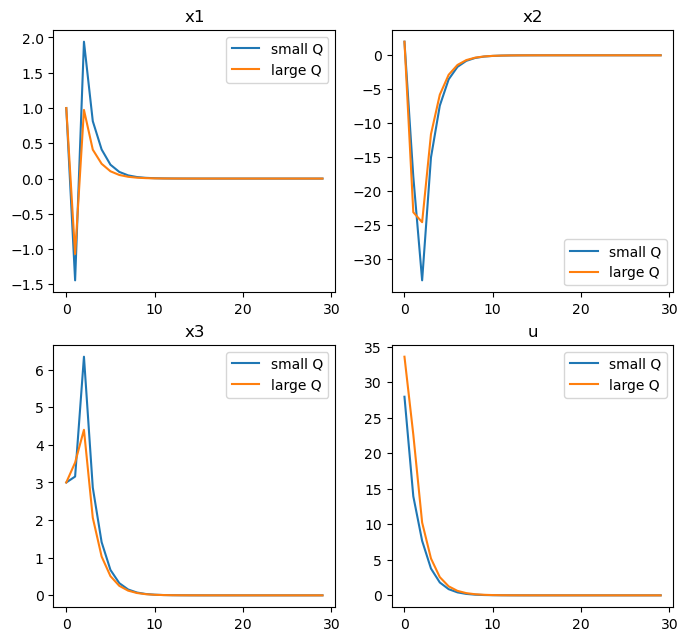

In [4]:
# 根据公式（4-1）计算x。
for k in np.arange(0,N-1):
    u1[:,k] = -K1 @ x1[:,k] # u = -Kx
    x1[:,k+1] = A @ x1[:,k] + B @ u1[:,k] # x = Ax + Bu
    u1_norm[k] = la.norm(u1[:,k]) # 计算u的范数，可以只画一张u的图了hhh
    u2[:,k] = -K2 @ x2[:,k]
    x2[:,k+1] = A @ x2[:,k] + B @ u2[:,k]
    u2_norm[k] = la.norm(u2[:,k])

time = np.arange(N)
legends = ['small Q','large Q']

# 低于python3.10，使用plt.subplot时，请在里面加逗号，例如plt.subplot(2,2,1)。
plt.figure(figsize=(8,7.5))
plt.subplot(221)
plt.plot(time,x1[0,:].T)
plt.plot(time,x2[0,:].T)
plt.legend(legends)
plt.title('x1')
plt.subplot(222)
plt.plot(time,x1[1,:].T)
plt.plot(time,x2[1,:].T)
plt.legend(legends)
plt.title('x2')
plt.subplot(223)
plt.plot(time,x1[2,:].T)
plt.plot(time,x2[2,:].T)
plt.legend(legends)
plt.title('x3')
plt.subplot(224)
plt.plot(time,u1_norm)
plt.plot(time,u2_norm)
plt.legend(legends)
plt.title('u')
plt.show()